<a href="https://colab.research.google.com/github/DeniseYuki/-Data-Science-analise-e-visualiza-o-de-dado/blob/main/Introdu%C3%A7%C3%A3o_a_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analisando as notas em geral**

In [3]:
import pandas as pd


In [5]:
notas = pd.read_csv("/content/ratings.csv")

In [ ]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]

In [8]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
notas["nota"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [11]:
notas["nota"].value_counts()

,count
nota,
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


In [13]:
notas.nota.mean()
notas.nota.median()

3.5

In [14]:
print("media", notas.nota.mean())
print("mediana", notas.nota.median())

media 3.501556983616962
mediana 3.5


<Axes: ylabel='Frequency'>

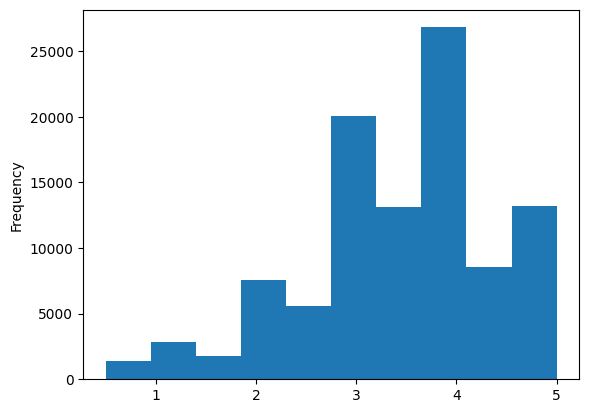

In [12]:
notas.nota.plot(kind="hist")

In [15]:
notas.nota.describe()

,nota
count,100836.000000
mean,3.501557
std,1.042529
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


<Axes: ylabel='nota'>

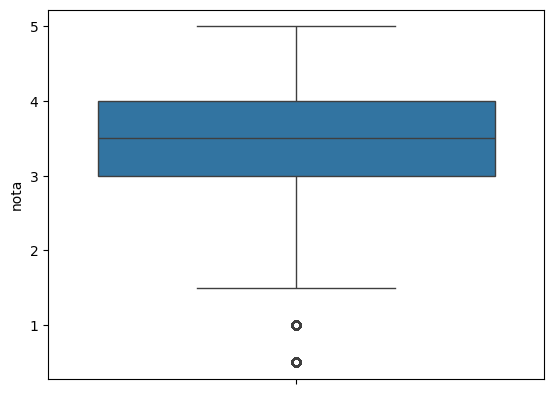

In [21]:
import seaborn as sns
sns.boxplot(notas.nota)



<Axes: xlabel='nota'>

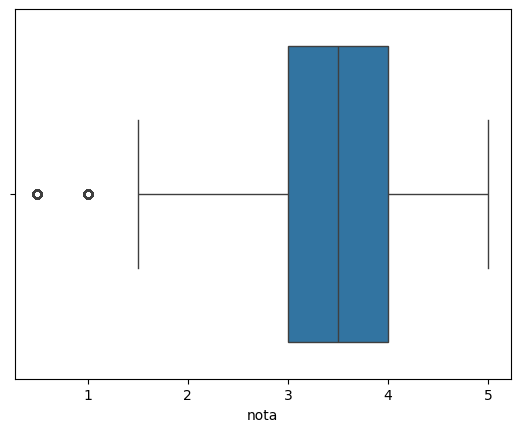

In [22]:
sns.boxplot(notas.nota, orient="h")


In [23]:
filmes = pd.read_csv("/content/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [24]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#**Analisando algumas notas especificas por filme**

In [28]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397